In [20]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [21]:
data_path = "./dataset/spotify_songs.csv"
data = pd.read_csv(data_path)

In [22]:
data.head(2)

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.00000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.00421,0.3570,0.693,99.972,162600


In [23]:
# Importer la bibliothèque nécessaire
from collections import Counter

# Extraire les formats uniques en convertissant les dates et gérant les erreurs
def get_date_format(date):
    formats = ["%Y-%m-%d", "%Y/%m/%d", "%d-%m-%Y", "%d/%m/%Y", "%Y"]
    for fmt in formats:
        try:
            pd.to_datetime(date, format=fmt)
            return fmt
        except ValueError:
            continue
    return "unknown"

# Appliquer la fonction pour déterminer les formats
date_formats = data["track_album_release_date"].apply(get_date_format)

# Compter les occurrences de chaque format
format_counts = Counter(date_formats)

# Afficher les résultats
print("Formats de dates et leur nombre de lignes :")
for fmt, count in format_counts.items():
    print(f"{fmt}: {count}")

Formats de dates et leur nombre de lignes :
%Y-%m-%d: 30947
%Y: 1855
unknown: 31


unknown = NaN


In [24]:
"""data["track_album_release_date"] = pd.to_datetime(data["track_album_release_date"])
data.columns"""
# Traiter les dates au format "%Y-%m-%d" et "%Y"
def convert_date(date):
    try:
        # Format complet "%Y-%m-%d"
        return pd.to_datetime(date, format="%Y-%m-%d")
    except ValueError:
        try:
            # Format année seule "%Y", compléter par "-01-01"
            return pd.to_datetime(date, format="%Y") + pd.offsets.DateOffset(months=0, days=0)
        except ValueError:
            # Marquer les dates inconnues comme NaT
            return pd.NaT

# Appliquer la conversion à toute la colonne
data["track_album_release_date"] = data["track_album_release_date"].apply(convert_date)

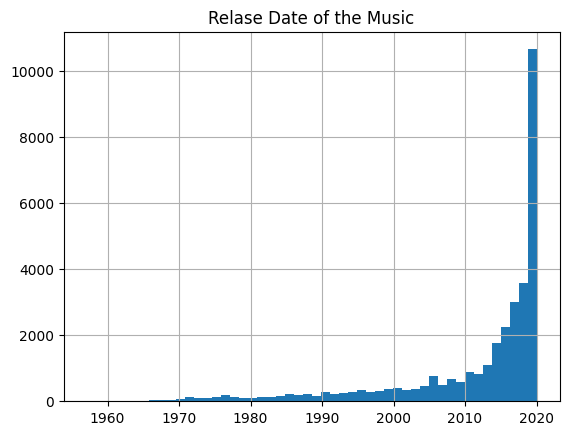

In [25]:
data["track_album_release_date"].hist(bins=50)
plt.title("Relase Date of the Music")
plt.show()

In [26]:
data_country = data.groupby('playlist_subgenre').size()
data_country.head()

playlist_subgenre
album rock       1065
big room         1206
classic rock     1296
dance pop        1298
electro house    1511
dtype: int64

### Test de la popularité actuelle des musiques en fonction de la date de sortie originelle de l'album

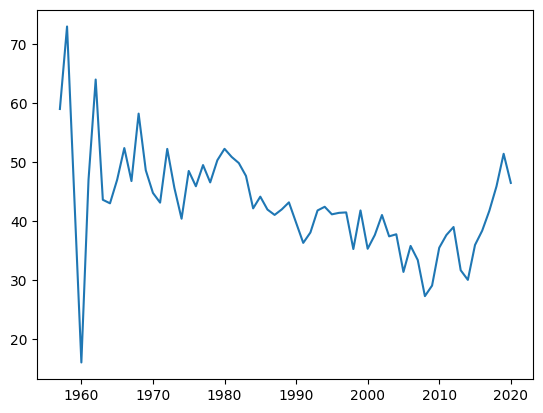

In [27]:
data_year = data.groupby(data['track_album_release_date'].dt.year)["track_popularity"].mean()
data_year = data_year.reset_index()

plt.plot(data_year["track_album_release_date"], data_year["track_popularity"])

array([[<Axes: title={'center': 'tempo'}>]], dtype=object)

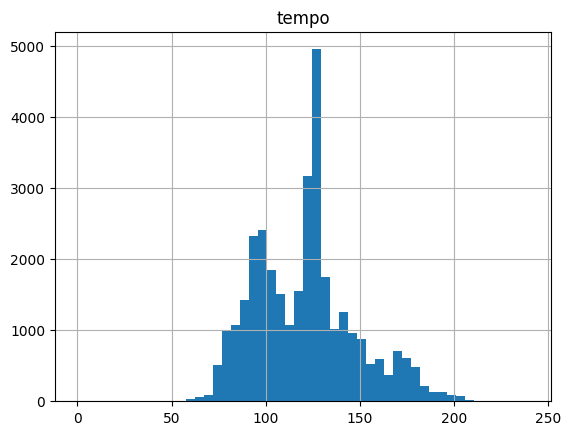

In [28]:
data.hist(column="tempo", bins=50)

In [29]:
data_tempo = data.groupby("tempo")["energy"].mean()
data_tempo = data_tempo.reset_index()
print(data_tempo.head())
# plt.bar(data_tempo["tempo"], data_tempo["energy"])

    tempo  energy
0   0.000  0.3150
1  35.477  0.1960
2  37.114  0.2520
3  38.985  0.3360
4  46.169  0.0658


In [30]:
bins = np.linspace(0,1,21) # Intervalles
bins
avg_arr = ((bins + np.roll(bins, -1))/2.0)[:-1] # Milieu des intervalles
avg_arr

array([0.025, 0.075, 0.125, 0.175, 0.225, 0.275, 0.325, 0.375, 0.425,
       0.475, 0.525, 0.575, 0.625, 0.675, 0.725, 0.775, 0.825, 0.875,
       0.925, 0.975])

    tempo  energy energy_range
0   0.000  0.3150  (0.3, 0.35]
1  35.477  0.1960  (0.15, 0.2]
2  37.114  0.2520  (0.25, 0.3]
3  38.985  0.3360  (0.3, 0.35]
4  46.169  0.0658  (0.05, 0.1]


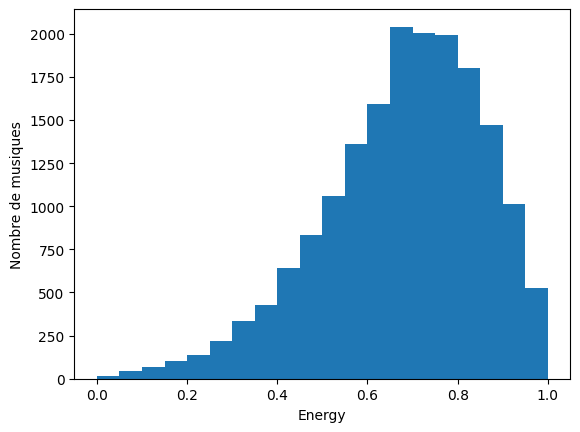

In [31]:
data_tempo['energy_range'] = pd.cut(data_tempo['energy'], bins)
print(data_tempo.head())
# Grouping by tempo range
test = data_tempo.groupby('energy_range')["tempo"].mean()
test = test.reset_index()

plt.hist(data_tempo['energy'], bins=bins)
plt.xlabel('Energy')
plt.ylabel('Nombre de musiques')
plt.show()

In [32]:
test.head()

,energy_range,tempo
0,"(0.0, 0.05]",115.392385
1,"(0.05, 0.1]",114.501952
2,"(0.1, 0.15]",109.066232
3,"(0.15, 0.2]",113.170009
4,"(0.2, 0.25]",113.715139


Text(0, 0.5, 'Tempo moyen')

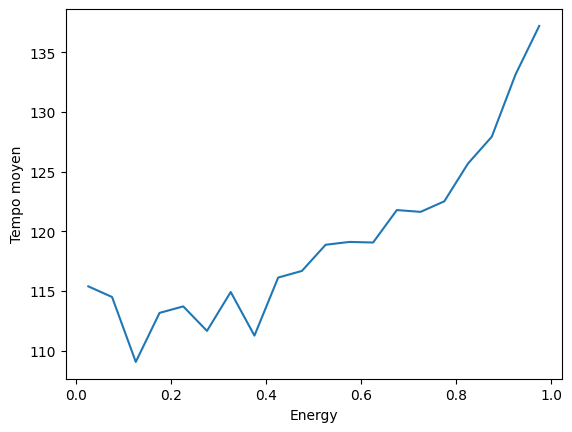

In [33]:
plt.plot(avg_arr,test['tempo'])
plt.xlabel('Energy')
plt.ylabel('Tempo moyen')

# Loudness

<Axes: >

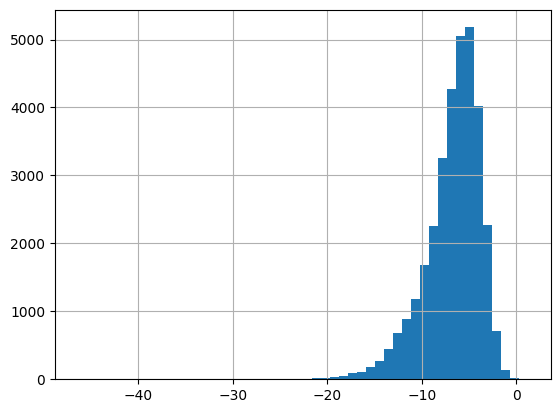

In [34]:
data["loudness"].hist(bins=50)

## TOUT

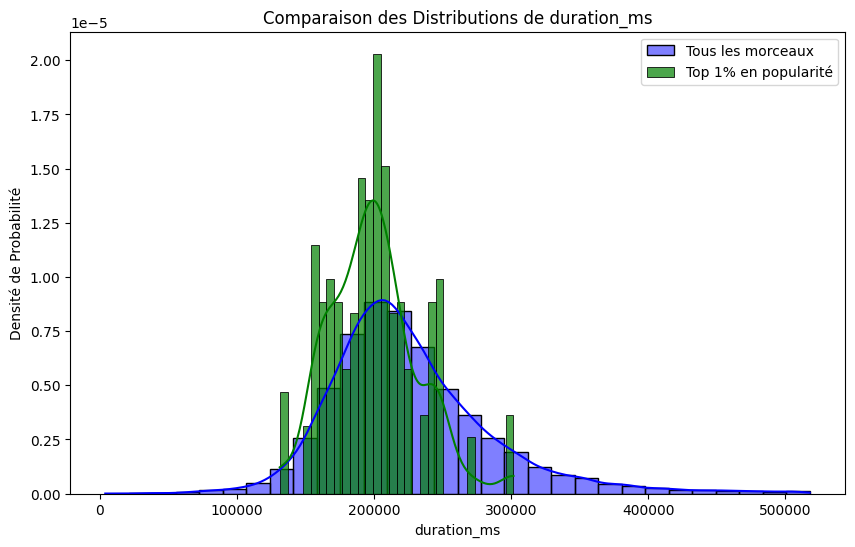

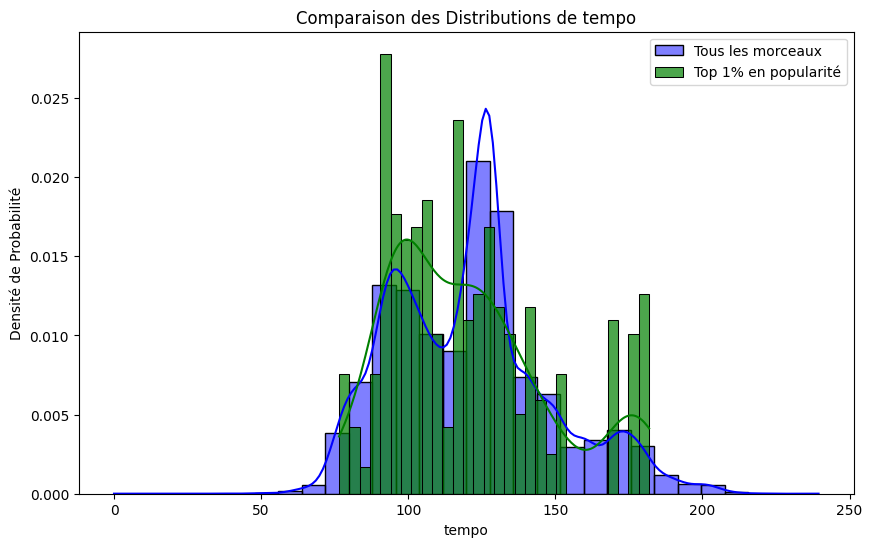

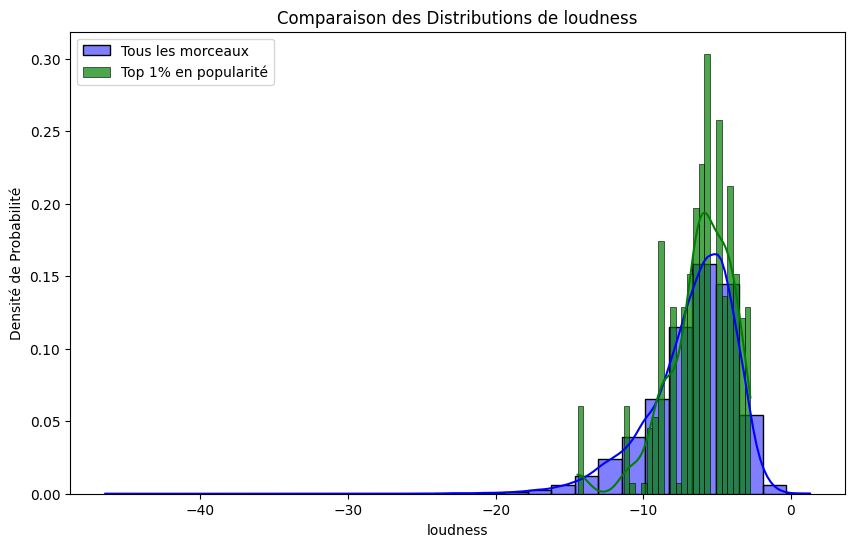

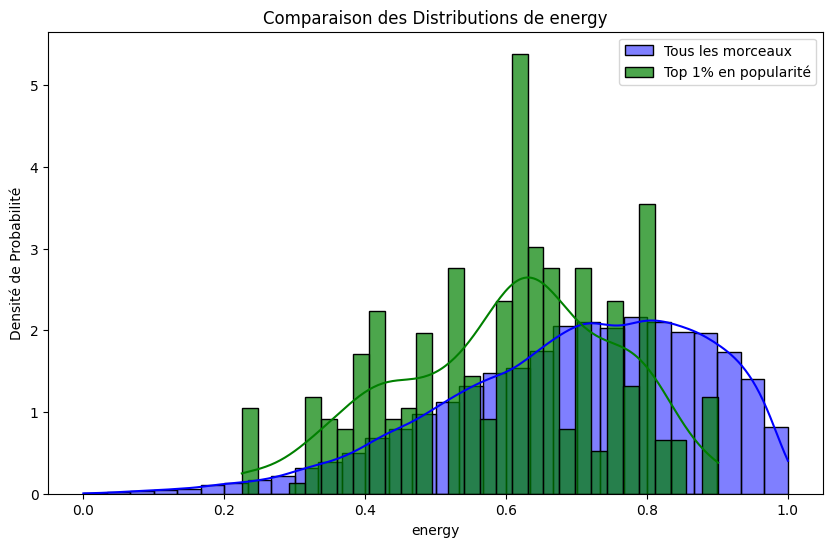

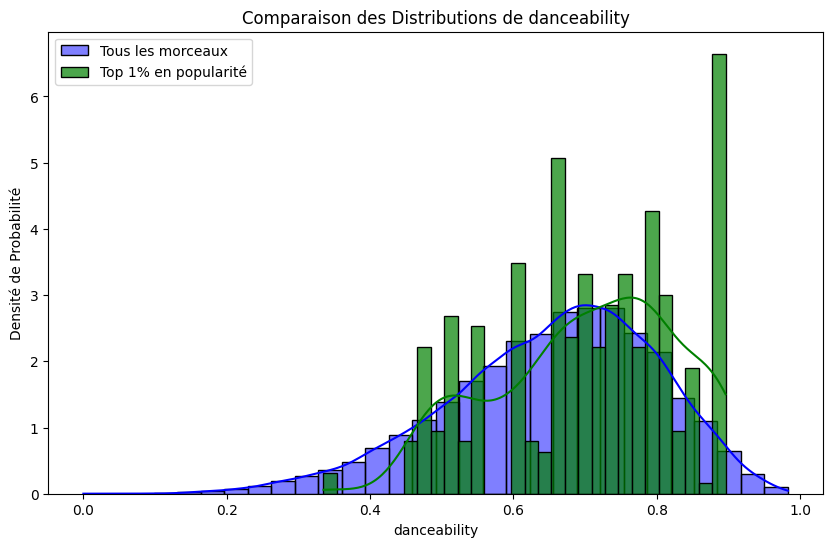

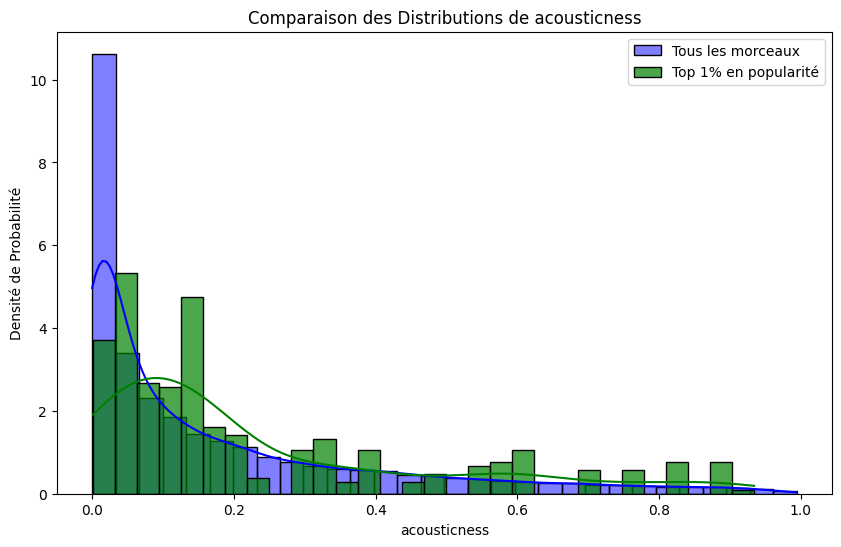

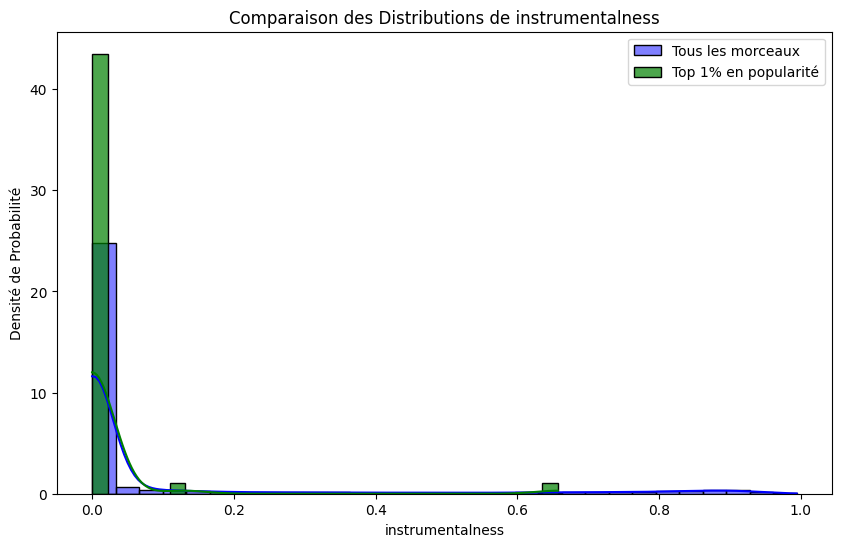

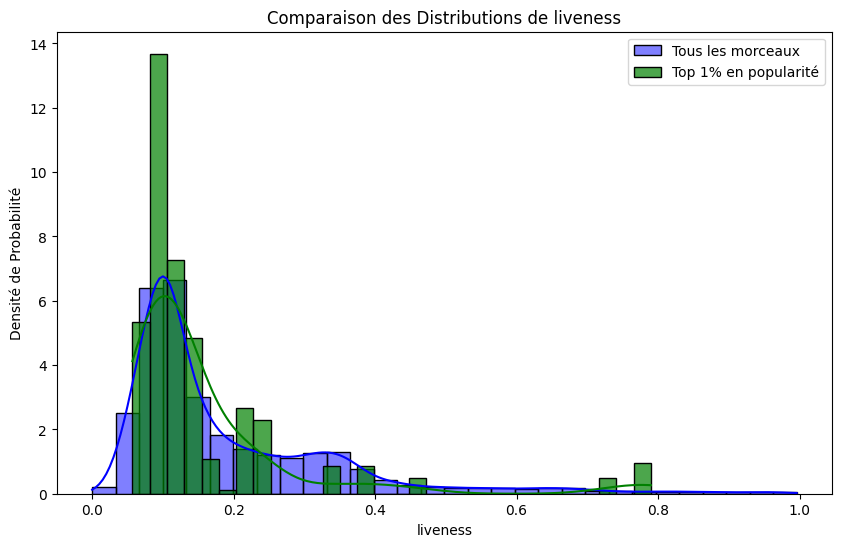

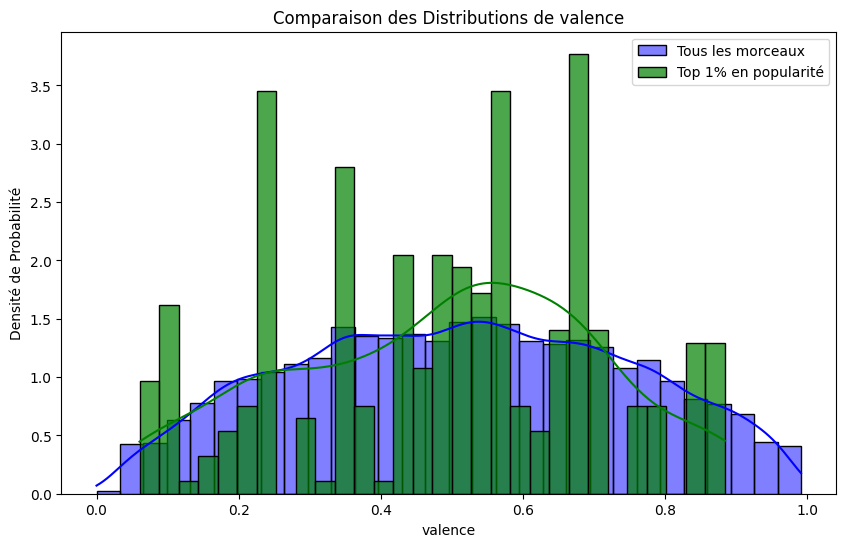

In [41]:
feature_list = ['duration_ms', 'tempo', 'loudness', 'energy', 'danceability', 'acousticness', 'instrumentalness', 'liveness', 'valence']

for feature in feature_list:

    # Calcul du seuil du top 10% en popularité
    top_10_threshold = data['track_popularity'].quantile(0.99)

    # Filtrer les morceaux appartenant au top 10%
    top_10_df = data[data['track_popularity'] >= top_10_threshold]

    # Tracer les distributions en tant que densité de probabilité (PDF)
    plt.figure(figsize=(10, 6))

    sns.histplot(data[feature], bins=30, kde=True, stat="density", color='blue', label='Tous les morceaux', alpha=0.5)
    sns.histplot(top_10_df[feature], bins=30, kde=True, stat="density", color='green', label='Top 1% en popularité', alpha=0.7)

    plt.title('Comparaison des Distributions de ' + feature)
    plt.xlabel(feature)
    plt.ylabel('Densité de Probabilité')
    plt.legend()
    plt.show()

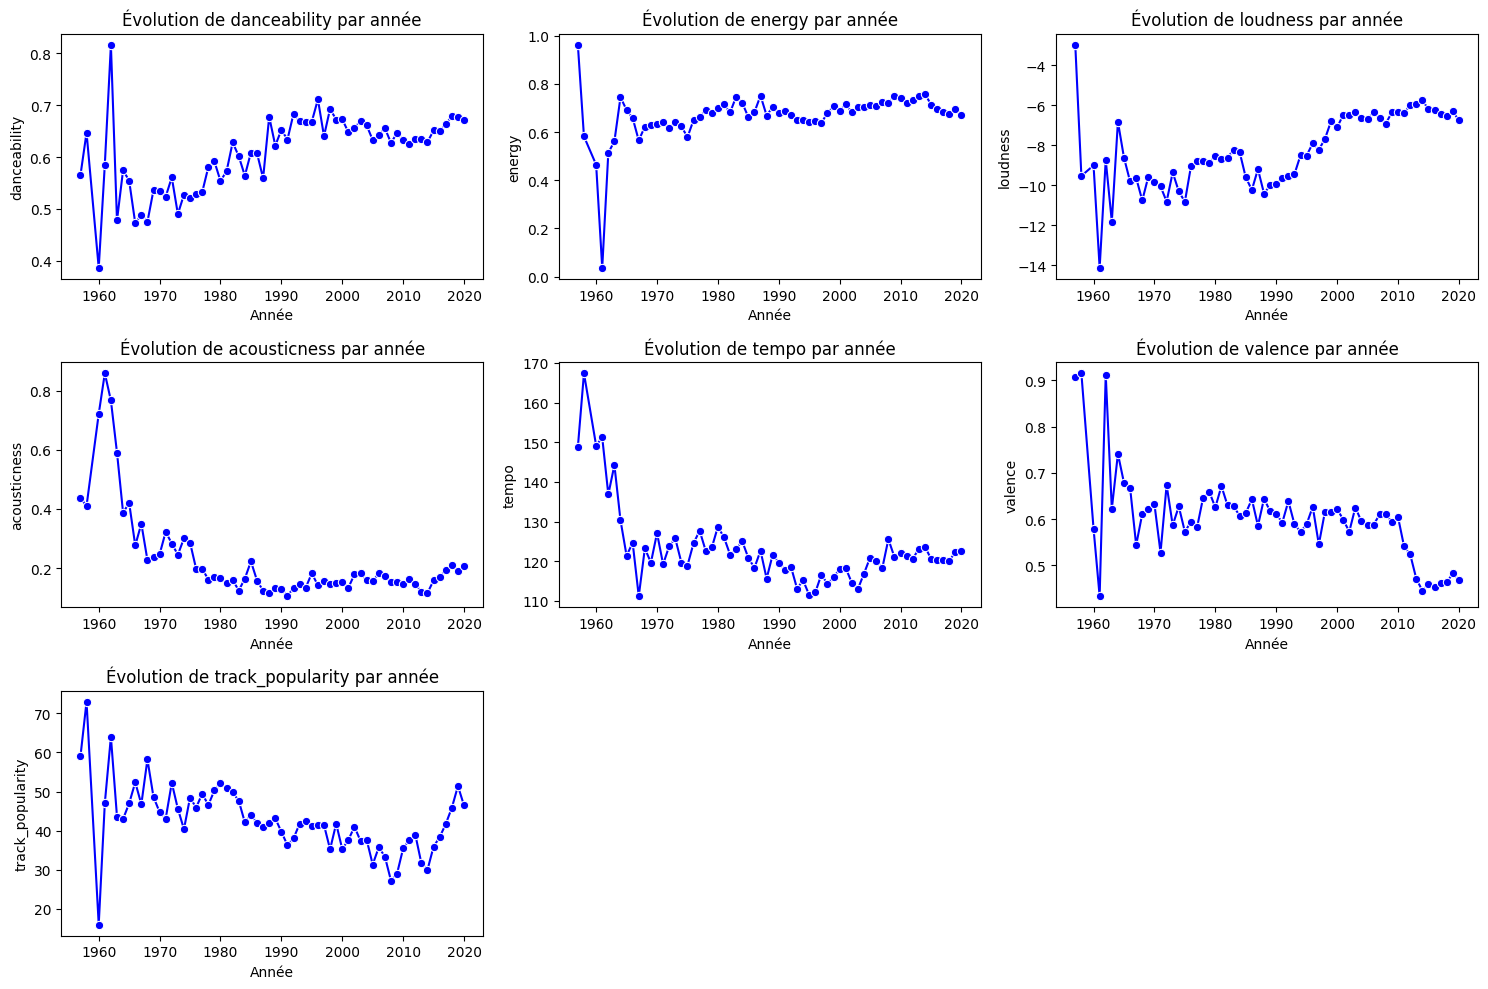

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Extraire l'année de la date de sortie
data['year'] = data['track_album_release_date'].dt.year

# Liste des variables à visualiser
variables_to_plot = ['danceability', 'energy', 'loudness', 'acousticness', 'tempo', 'valence', 'track_popularity']

# Créer un graphique pour chaque variable, en moyennant par année
plt.figure(figsize=(15, 10))

for i, var in enumerate(variables_to_plot, 1):
    plt.subplot(3, 3, i)  # Disposer les graphiques sur une grille 3x3
    # Calculer la moyenne par année
    annual_mean = data.groupby('year')[var].mean().reset_index()
    sns.lineplot(data=annual_mean, x='year', y=var, marker='o', color='b')
    plt.title(f'Évolution de {var} par année')
    plt.xlabel('Année')
    plt.ylabel(var)

plt.tight_layout()  # Ajuster la disposition des graphiques
plt.show()

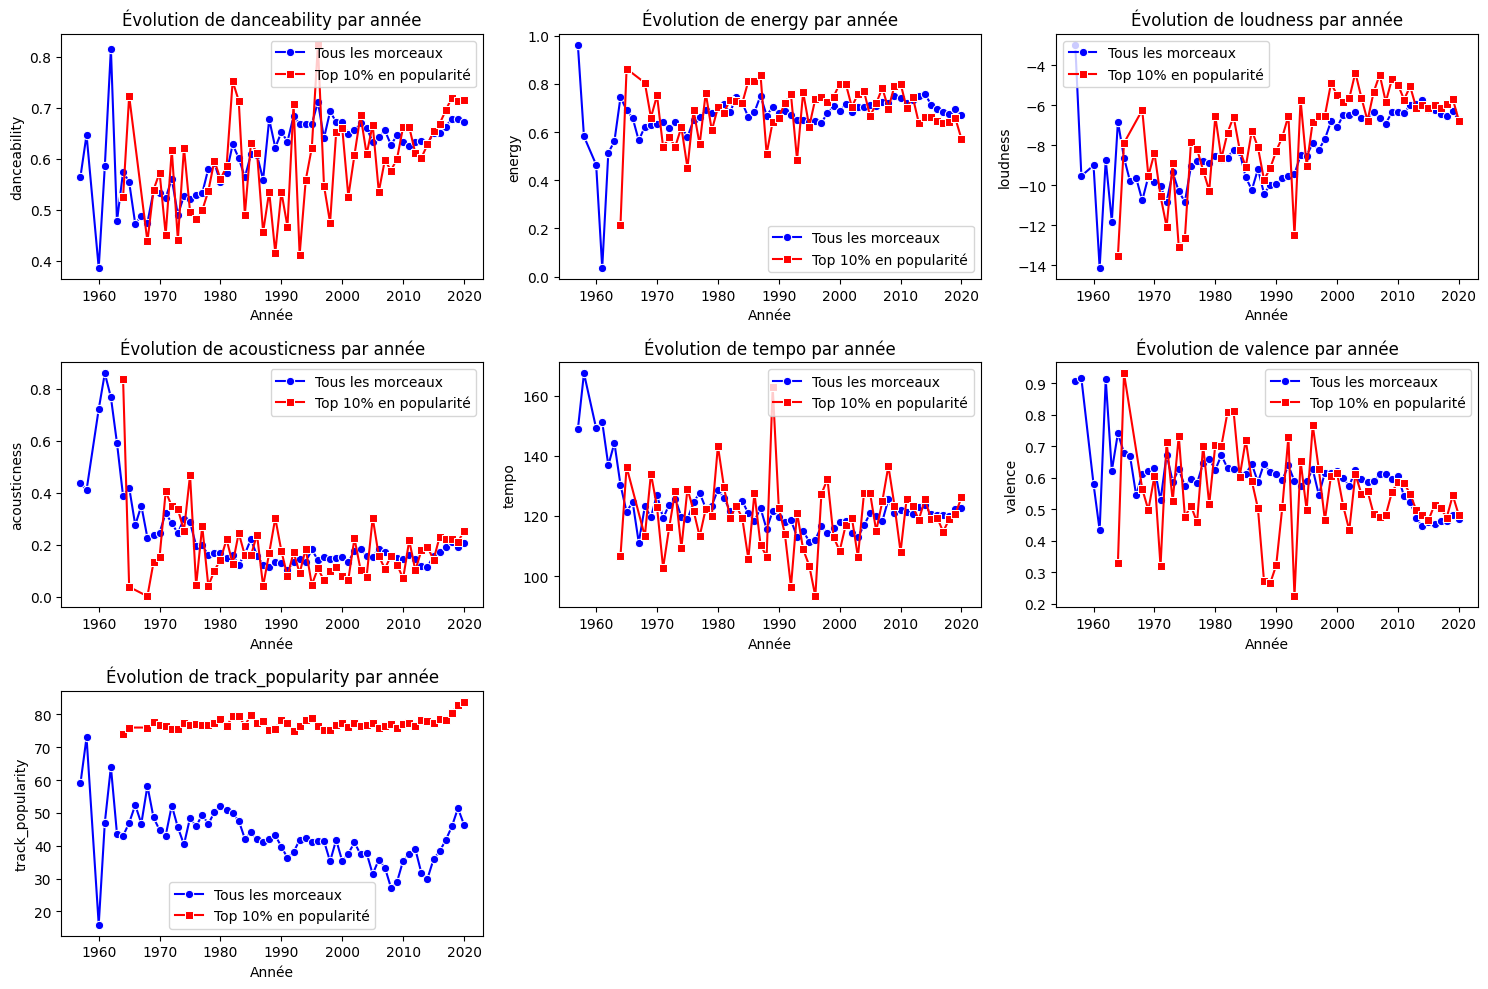

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Extraire l'année de la date de sortie
data['year'] = pd.to_datetime(data['track_album_release_date']).dt.year

# Définir les variables à visualiser
variables_to_plot = ['danceability', 'energy', 'loudness', 'acousticness', 'tempo', 'valence', 'track_popularity']

# Définir la figure
plt.figure(figsize=(15, 10))

for i, var in enumerate(variables_to_plot, 1):
    plt.subplot(3, 3, i)  # Disposer les graphiques sur une grille 3x3
    
    # Moyenne générale par année
    annual_mean = data.groupby('year')[var].mean().reset_index()
    
    # Sélectionner le top 10% des morceaux en popularité
    top_10_threshold = data['track_popularity'].quantile(0.90)
    top_10_data = data[data['track_popularity'] >= top_10_threshold]
    
    # Moyenne pour le top 10% par année
    top_10_annual_mean = top_10_data.groupby('year')[var].mean().reset_index()
    
    # Tracer les courbes
    sns.lineplot(data=annual_mean, x='year', y=var, marker='o', color='b', label='Tous les morceaux')
    sns.lineplot(data=top_10_annual_mean, x='year', y=var, marker='s', color='r', label='Top 10% en popularité')

    plt.title(f'Évolution de {var} par année')
    plt.xlabel('Année')
    plt.ylabel(var)
    plt.legend()

plt.tight_layout()
plt.show()


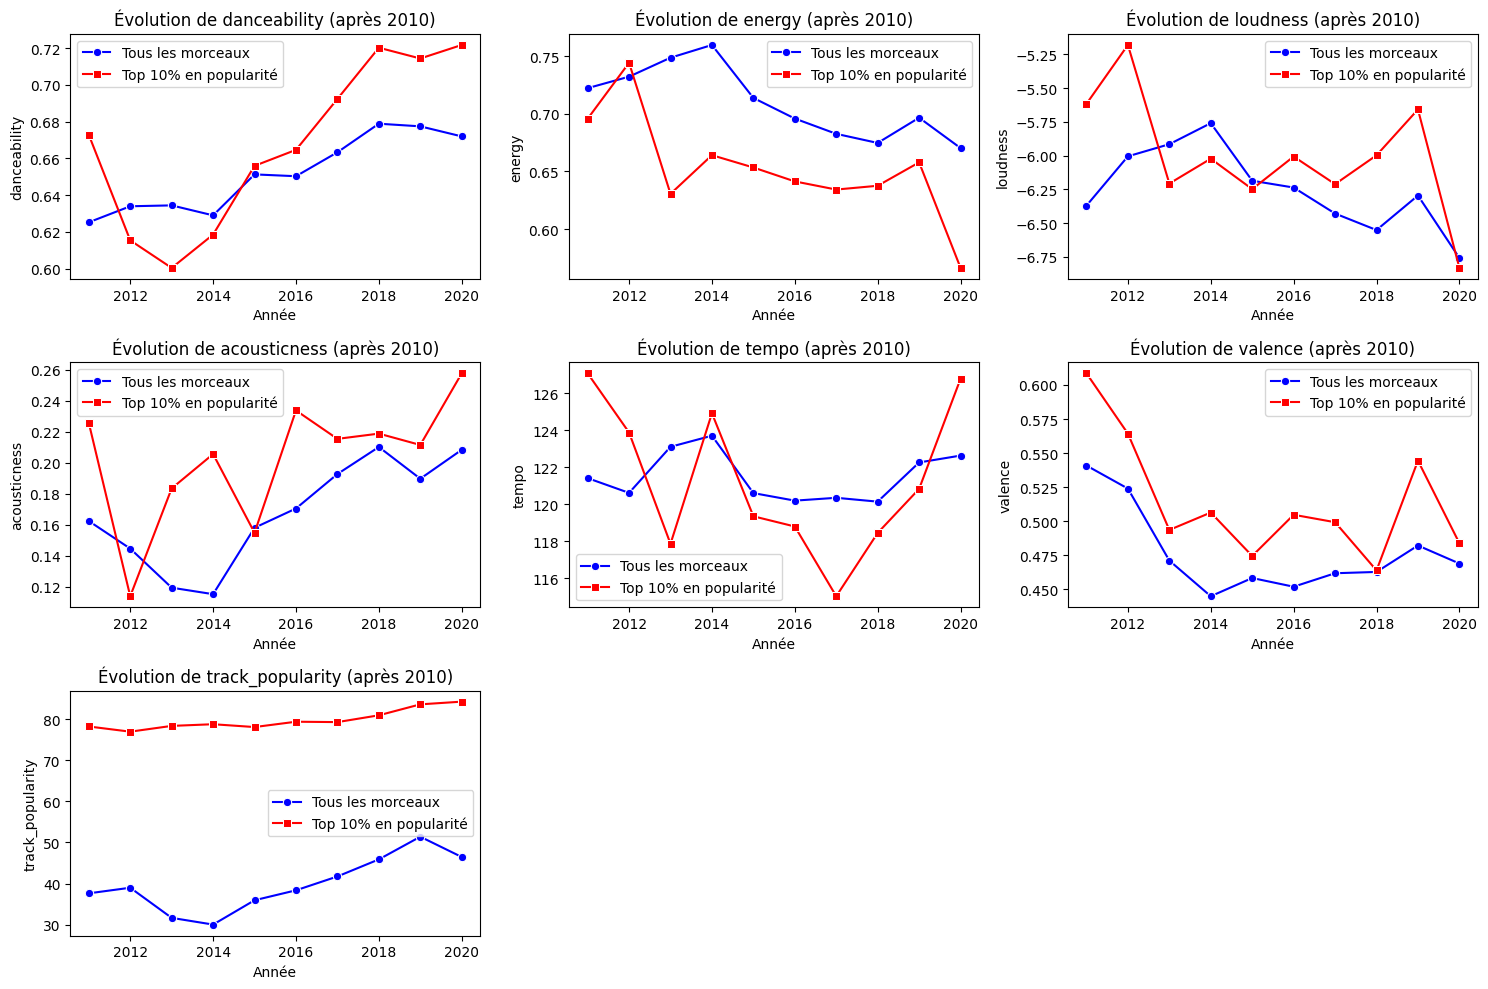

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Extraire l'année de la date de sortie
data['year'] = pd.to_datetime(data['track_album_release_date']).dt.year

# Filtrer les données après 2010
data_filtered = data[data['year'] > 2010]

# Définir les variables à visualiser
variables_to_plot = ['danceability', 'energy', 'loudness', 'acousticness', 'tempo', 'valence', 'track_popularity']

# Définir la figure
plt.figure(figsize=(15, 10))

for i, var in enumerate(variables_to_plot, 1):
    plt.subplot(3, 3, i)  # Disposer les graphiques sur une grille 3x3
    
    # Moyenne générale par année (après 2010)
    annual_mean = data_filtered.groupby('year')[var].mean().reset_index()
    
    # Sélectionner le top 10% des morceaux en popularité
    top_10_threshold = data_filtered['track_popularity'].quantile(0.90)
    top_10_data = data_filtered[data_filtered['track_popularity'] >= top_10_threshold]
    
    # Moyenne pour le top 10% par année (après 2010)
    top_10_annual_mean = top_10_data.groupby('year')[var].mean().reset_index()
    
    # Tracer les courbes
    sns.lineplot(data=annual_mean, x='year', y=var, marker='o', color='b', label='Tous les morceaux')
    sns.lineplot(data=top_10_annual_mean, x='year', y=var, marker='s', color='r', label='Top 10% en popularité')

    plt.title(f'Évolution de {var} (après 2010)')
    plt.xlabel('Année')
    plt.ylabel(var)
    plt.legend()

plt.tight_layout()
plt.show()

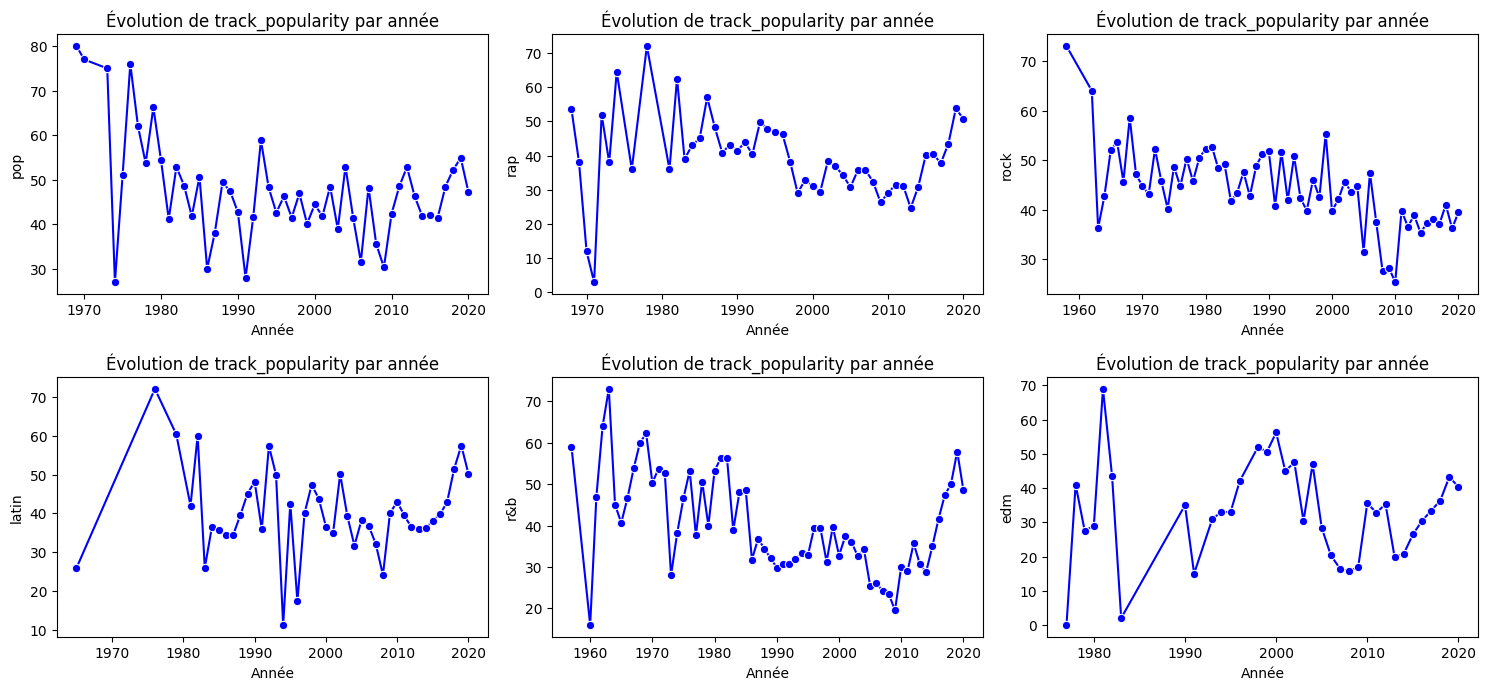

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Extraire l'année de la date de sortie
data['year'] = data['track_album_release_date'].dt.year

genres = data['playlist_genre'].unique()

plt.figure(figsize=(15, 10))

for i, genre in enumerate(genres, 1):
    plt.subplot(3, 3, i)  # Disposer les graphiques sur une grille 3x3
    # Calculer la moyenne par année
    genre_data = data[data['playlist_genre'] == genre]
    annual_mean = genre_data.groupby('year')["track_popularity"].mean().reset_index()
    sns.lineplot(data=annual_mean, x='year', y=var, marker='o', color='b')
    plt.title(f'Évolution de {var} par année')
    plt.xlabel('Année')
    plt.ylabel(genre)

plt.tight_layout()  # Ajuster la disposition des graphiques
plt.show()